In [1]:
import pandas as pd

def get_velocity_power(cube, condition, csv_path='./regimes/Experimental_parameters.csv'):
    """
    Get velocity and power parameters for a given cube and condition.
    
    Args:
        cube (int): Cube number (1-4)
        condition (int): Condition number (1-12)
        csv_path (str): Path to the parameters CSV file
        
    Returns:
        tuple: (velocity (mm/s), power (W))
        
    Raises:
        ValueError: If cube or condition are out of valid ranges
        FileNotFoundError: If CSV file cannot be found
    """
    # Input validation
    if not 1 <= cube <= 4:
        raise ValueError("Cube number must be between 1 and 4")
    if not 1 <= condition <= 12:
        raise ValueError("Condition number must be between 1 and 12")
    
    # Read CSV file
    params_df = pd.read_csv(csv_path)
    
    # Calculate row index
    row_index = (cube - 1) * 12 + (condition - 1)
    
    # Get parameters
    velocity = params_df.iloc[row_index]['Velocity']
    power = params_df.iloc[row_index]['Power']
    
    return velocity, power

In [2]:
velocity, power = get_velocity_power(cube=1, condition=1)
print(f"Velocity: {velocity} mm/s, Power: {power} W")

Velocity: 1100.0 mm/s, Power: 380.0 W


In [3]:
velocity, power = get_velocity_power(cube=4, condition=12)
print(f"Velocity: {velocity} mm/s, Power: {power} W")

Velocity: 1400.0 mm/s, Power: 330.0 W


In [4]:
import pickle 
# Load features data
with open('extracted_features.pickle', 'rb') as f:
    features_data = pickle.load(f)


In [5]:
import pandas as pd
import numpy as np

def create_summary_table(features_data, params_csv_path='./regimes/Experimental_parameters.csv'):
    """
    Create a comprehensive summary of all parameters and features in the dataset.
    
    Args:
        features_data (dict): The hierarchical features dictionary
        params_csv_path (str): Path to parameters CSV file
    """
    # Read parameters CSV
    params_df = pd.read_csv(params_csv_path)
    
    # Initialize summary dictionary with cleaned float values
    summary = {
        'Experimental Parameters': {
            'Power (W)': {
                'Unique Values': [float(x) for x in sorted(params_df['Power'].unique())],
                'Range': [float(params_df['Power'].min()), float(params_df['Power'].max())]
            },
            'Velocity (mm/s)': {
                'Unique Values': [float(x) for x in sorted(params_df['Velocity'].unique())],
                'Range': [float(params_df['Velocity'].min()), float(params_df['Velocity'].max())]
            }
        },
        'Data Structure': {
            'Cubes': sorted(features_data.keys()),
            'Conditions per Cube': len(next(iter(features_data.values()))),
            'Lines per Condition': len(next(iter(next(iter(features_data.values())).values())))
        }
    }
    
    # Get example data point to extract feature names
    example_cube = next(iter(features_data.keys()))
    example_condition = next(iter(features_data[example_cube].keys()))
    example_line = next(iter(features_data[example_cube][example_condition].keys()))
    
    # Get thresholds for area features
    area_thresholds = sorted(features_data[example_cube][example_condition][example_line]['area'].keys())
    summary['Area Analysis'] = {
        'Thresholds': area_thresholds
    }
    
    # Get feature names
    spatter_features = sorted(features_data[example_cube][example_condition][example_line]['spatter'].keys())
    area_features = sorted(features_data[example_cube][example_condition][example_line]['area'][area_thresholds[0]].keys())
    
    summary['Features'] = {
        'Spatter Features': spatter_features,
        'Area Features': area_features
    }
    
    # Print summary in a formatted way
    print("=== Dataset Summary ===\n")
    
    print("Experimental Parameters:")
    print("-----------------------")
    for param, details in summary['Experimental Parameters'].items():
        print(f"\n{param}")
        print(f"Unique values: {[f'{x:.1f}' for x in details['Unique Values']]}")
        print(f"Range: {details['Range'][0]:.1f} to {details['Range'][1]:.1f}")
    
    print("\nData Structure:")
    print("--------------")
    print(f"Number of Cubes: {len(summary['Data Structure']['Cubes'])}")
    print(f"Conditions per Cube: {summary['Data Structure']['Conditions per Cube']}")
    print(f"Lines per Condition: {summary['Data Structure']['Lines per Condition']}")
    
    print("\nArea Analysis:")
    print("-------------")
    print(f"Available Thresholds: {summary['Area Analysis']['Thresholds']}")
    
    print("\nFeature Sets:")
    print("-------------")
    print("\nSpatter Features:")
    for feature in summary['Features']['Spatter Features']:
        print(f"- {feature}")
    
    print("\nArea Features:")
    for feature in summary['Features']['Area Features']:
        print(f"- {feature}")
    
    return summary

In [6]:
summary = create_summary_table(features_data)


=== Dataset Summary ===

Experimental Parameters:
-----------------------

Power (W)
Unique values: ['60.0', '85.0', '105.0', '110.0', '130.0', '135.0', '155.0', '160.0', '180.0', '185.0', '205.0', '210.0', '230.0', '235.0', '255.0', '260.0', '280.0', '285.0', '305.0', '310.0', '330.0', '335.0', '355.0', '360.0', '380.0', '405.0']
Range: 60.0 to 405.0

Velocity (mm/s)
Unique values: ['500.0', '800.0', '1100.0', '1400.0']
Range: 500.0 to 1400.0

Data Structure:
--------------
Number of Cubes: 4
Conditions per Cube: 12
Lines per Condition: 5

Area Analysis:
-------------
Available Thresholds: [1, 2, 3, 5, 10, 25, 50, 75, 100, 150]

Feature Sets:
-------------

Spatter Features:
- autocorr_lag1
- cv
- dominant_freq
- iqr
- kurtosis
- ma_stability
- median
- percentile_5
- percentile_95
- r2
- signal_energy
- skewness
- slope
- std

Area Features:
- autocorr_lag1
- cv
- dominant_freq
- iqr
- kurtosis
- ma_stability
- median
- percentile_5
- percentile_95
- r2
- signal_energy
- skewness
- s

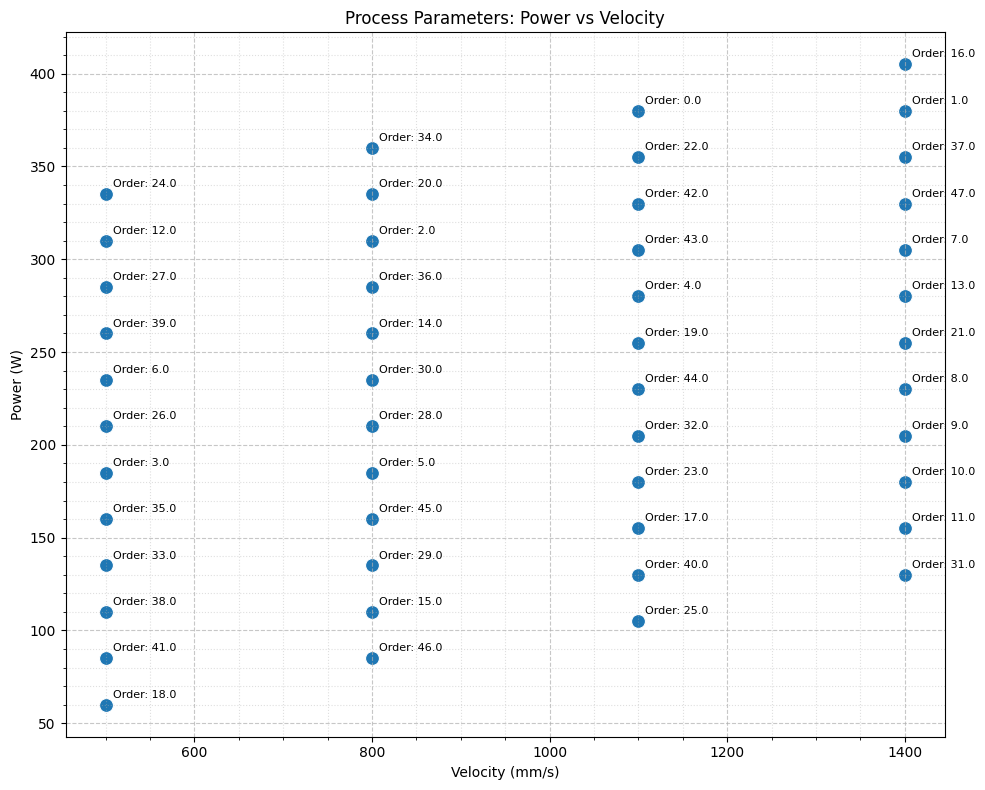

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
params_df = pd.read_csv('./regimes/Experimental_parameters.csv')

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=params_df, x='Velocity', y='Power', s=100)

# Add labels and title
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Power (W)')
plt.title('Process Parameters: Power vs Velocity')

# Add finer grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', alpha=0.4)

# Annotate points with their order
for idx, row in params_df.iterrows():
    plt.annotate(f'Order: {row["Order"]}', 
                (row['Velocity'], row['Power']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8)

plt.tight_layout()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import product

def plot_feature_distributions_by_parameter(
    features_data,
    parameter_type,
    parameter_value,
    feature_type='spatter',
    threshold=50,
    csv_path='./regimes/Experimental_parameters.csv'
):
    """
    Plot feature distributions for a specific power or velocity value.
    
    Args:
        features_data (dict): The hierarchical features dictionary
        parameter_type (str): Either 'power' or 'velocity'
        parameter_value (float): The specific parameter value to analyze
        feature_type (str): Either 'spatter' or 'area'
        threshold (int): Threshold value for area features
        csv_path (str): Path to parameters CSV file
    """
    # Input validation
    if parameter_type not in ['power', 'velocity']:
        raise ValueError("parameter_type must be either 'power' or 'velocity'")
    if feature_type not in ['spatter', 'area']:
        raise ValueError("feature_type must be either 'spatter' or 'area'")
        
    # Create DataFrame with features and parameters
    rows = []
    for cube, condition, line in product(
        features_data.keys(),
        features_data[1].keys(),
        features_data[1][1].keys()
    ):
        try:
            # Get power and velocity for this combination
            velocity, power = get_velocity_power(cube, condition, csv_path)
            
            # Check if this matches our parameter criteria
            if parameter_type == 'power' and power != parameter_value:
                continue
            if parameter_type == 'velocity' and velocity != parameter_value:
                continue
                
            # Get features
            if feature_type == 'spatter':
                features = features_data[cube][condition][line]['spatter']
            else:  # area
                features = features_data[cube][condition][line]['area'][threshold]
            
            # Add row with features and parameters
            row = {
                'cube': cube,
                'condition': condition,
                'line': line,
                'power': power,
                'velocity': velocity,
                **features
            }
            rows.append(row)
        except KeyError:
            continue
    
    df = pd.DataFrame(rows)
    
    if df.empty:
        raise ValueError(f"No data found for {parameter_type}={parameter_value}")
    
    # Get features to plot
    features = [col for col in df.columns 
               if col not in ['cube', 'condition', 'line', 'power', 'velocity']]
    
    # Set up plotting
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten()
    
    # Variable parameter will be on x-axis
    x_parameter = 'velocity' if parameter_type == 'power' else 'power'
    
    # Create plots
    for ax, feature in zip(axes, features):
        # Sort by the varying parameter
        sorted_df = df.sort_values(x_parameter)
                
        # Create boxplot
        sns.boxplot(data=sorted_df, x=x_parameter, y=feature, ax=ax)
        ax.set_title(f'{feature} vs {x_parameter}')
        ax.tick_params(axis='x', rotation=45)
        
    # Remove empty subplots
    for ax in axes[len(features):]:
        ax.remove()
    
    # Set title
    title = f'Feature Distributions - {feature_type.capitalize()}'
    if feature_type == 'area':
        title += f' (Threshold {threshold})'
    title += f'\nFor {parameter_type}={parameter_value}'
    
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

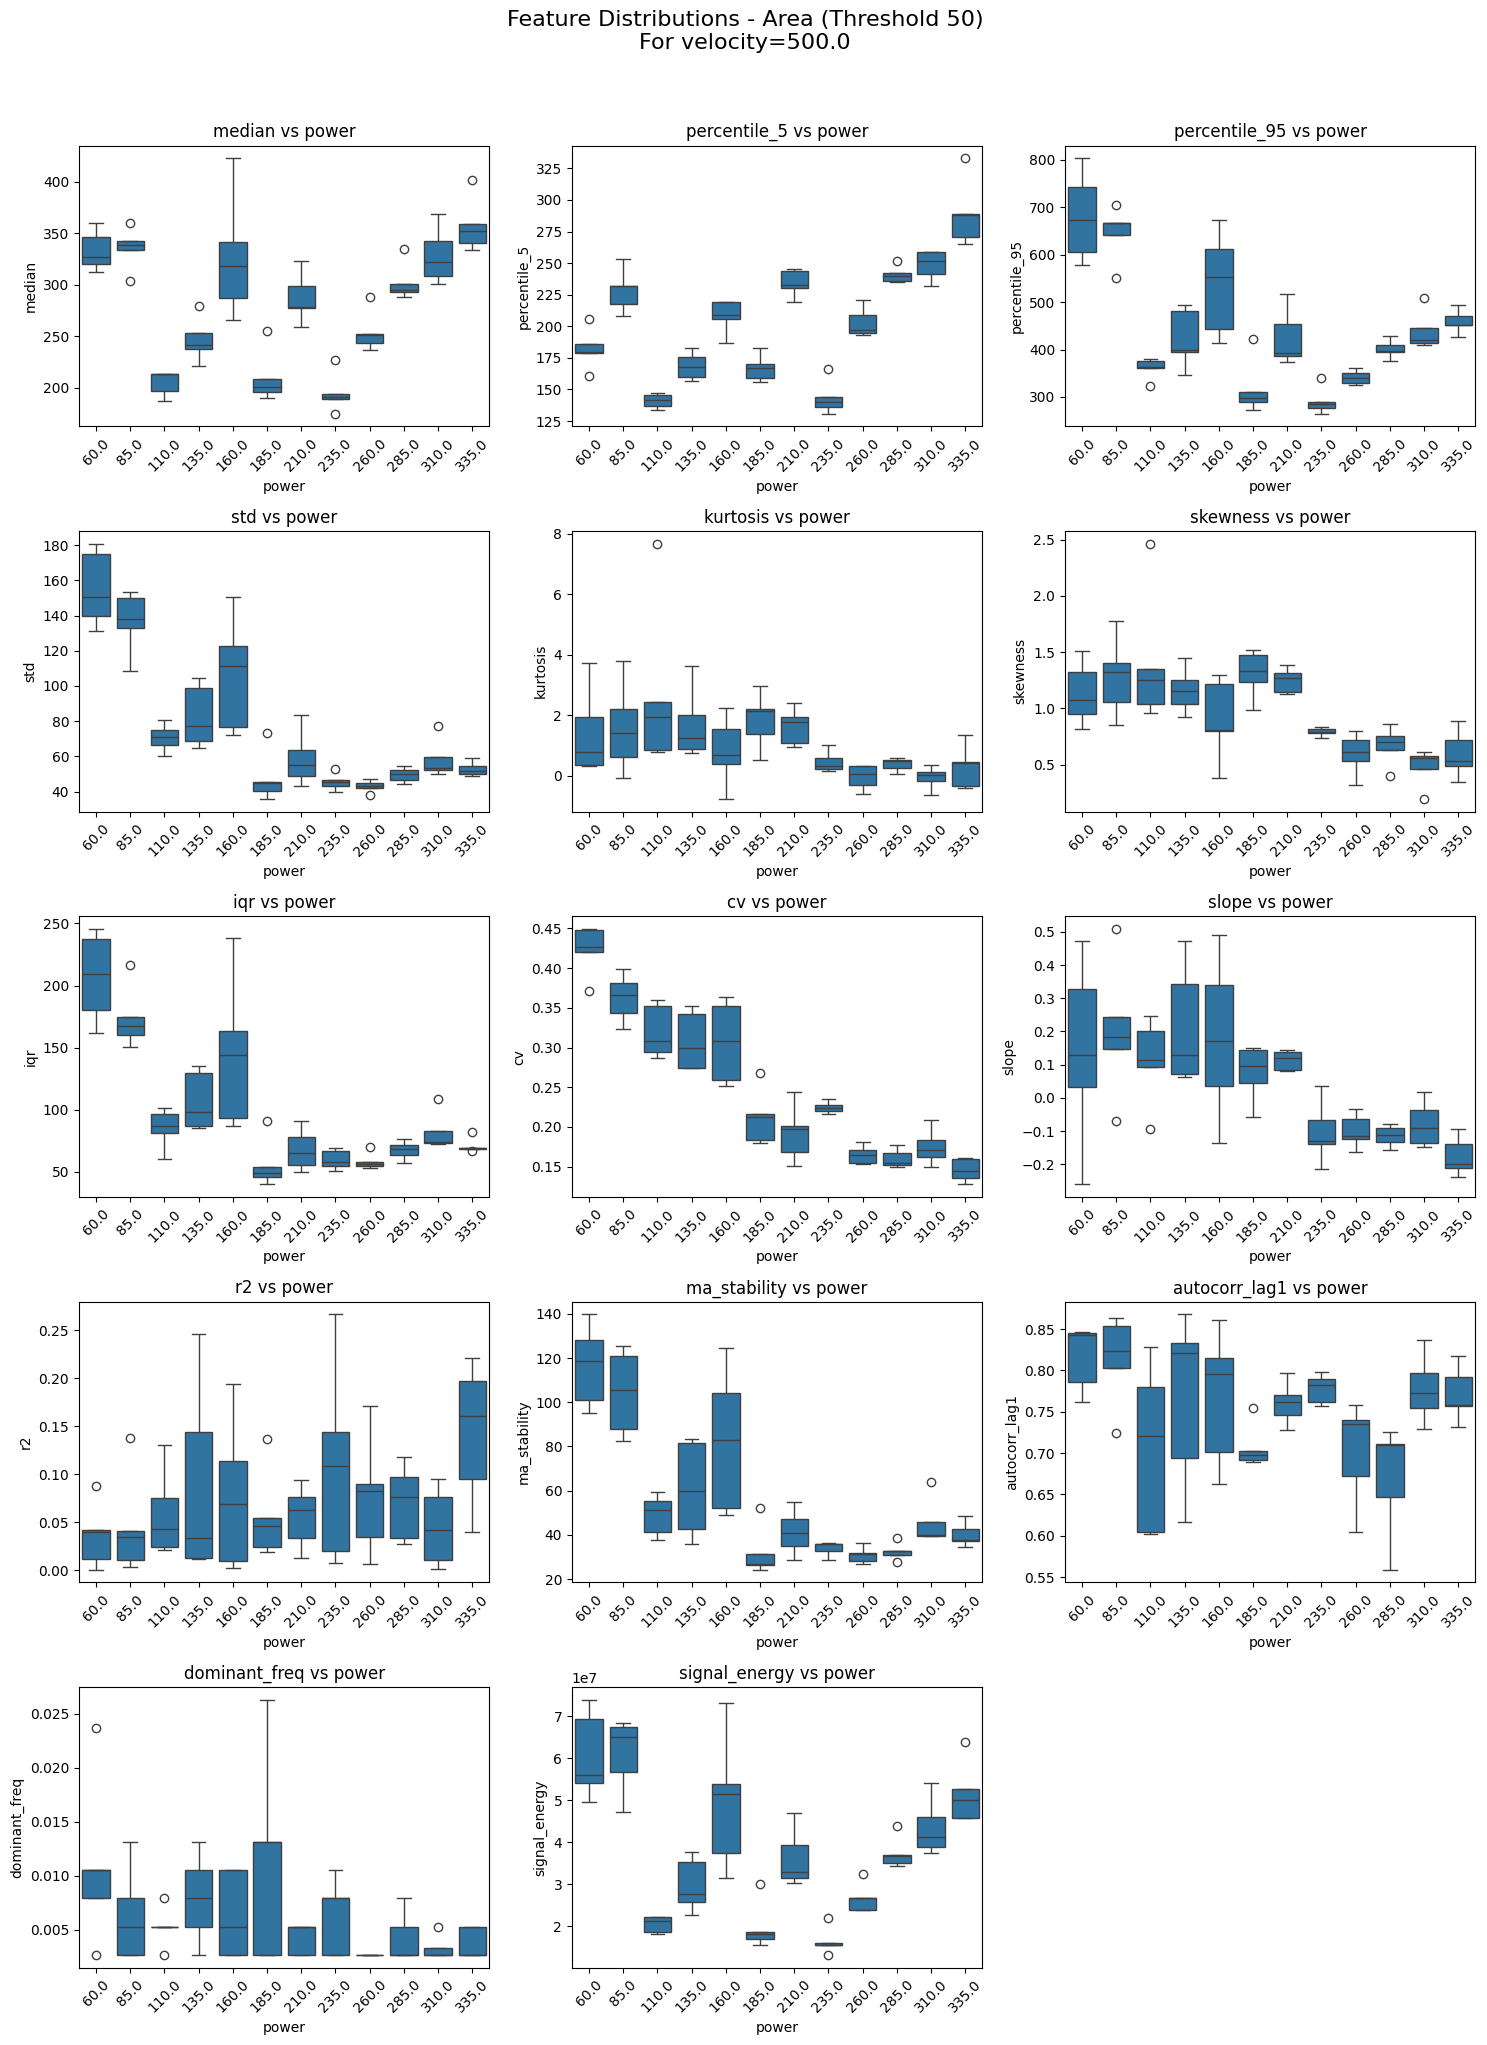

In [9]:
# Plot area features
plot_feature_distributions_by_parameter(
    features_data,
    parameter_type='velocity',
    parameter_value=500.0,
    feature_type='area',
    threshold=50
)

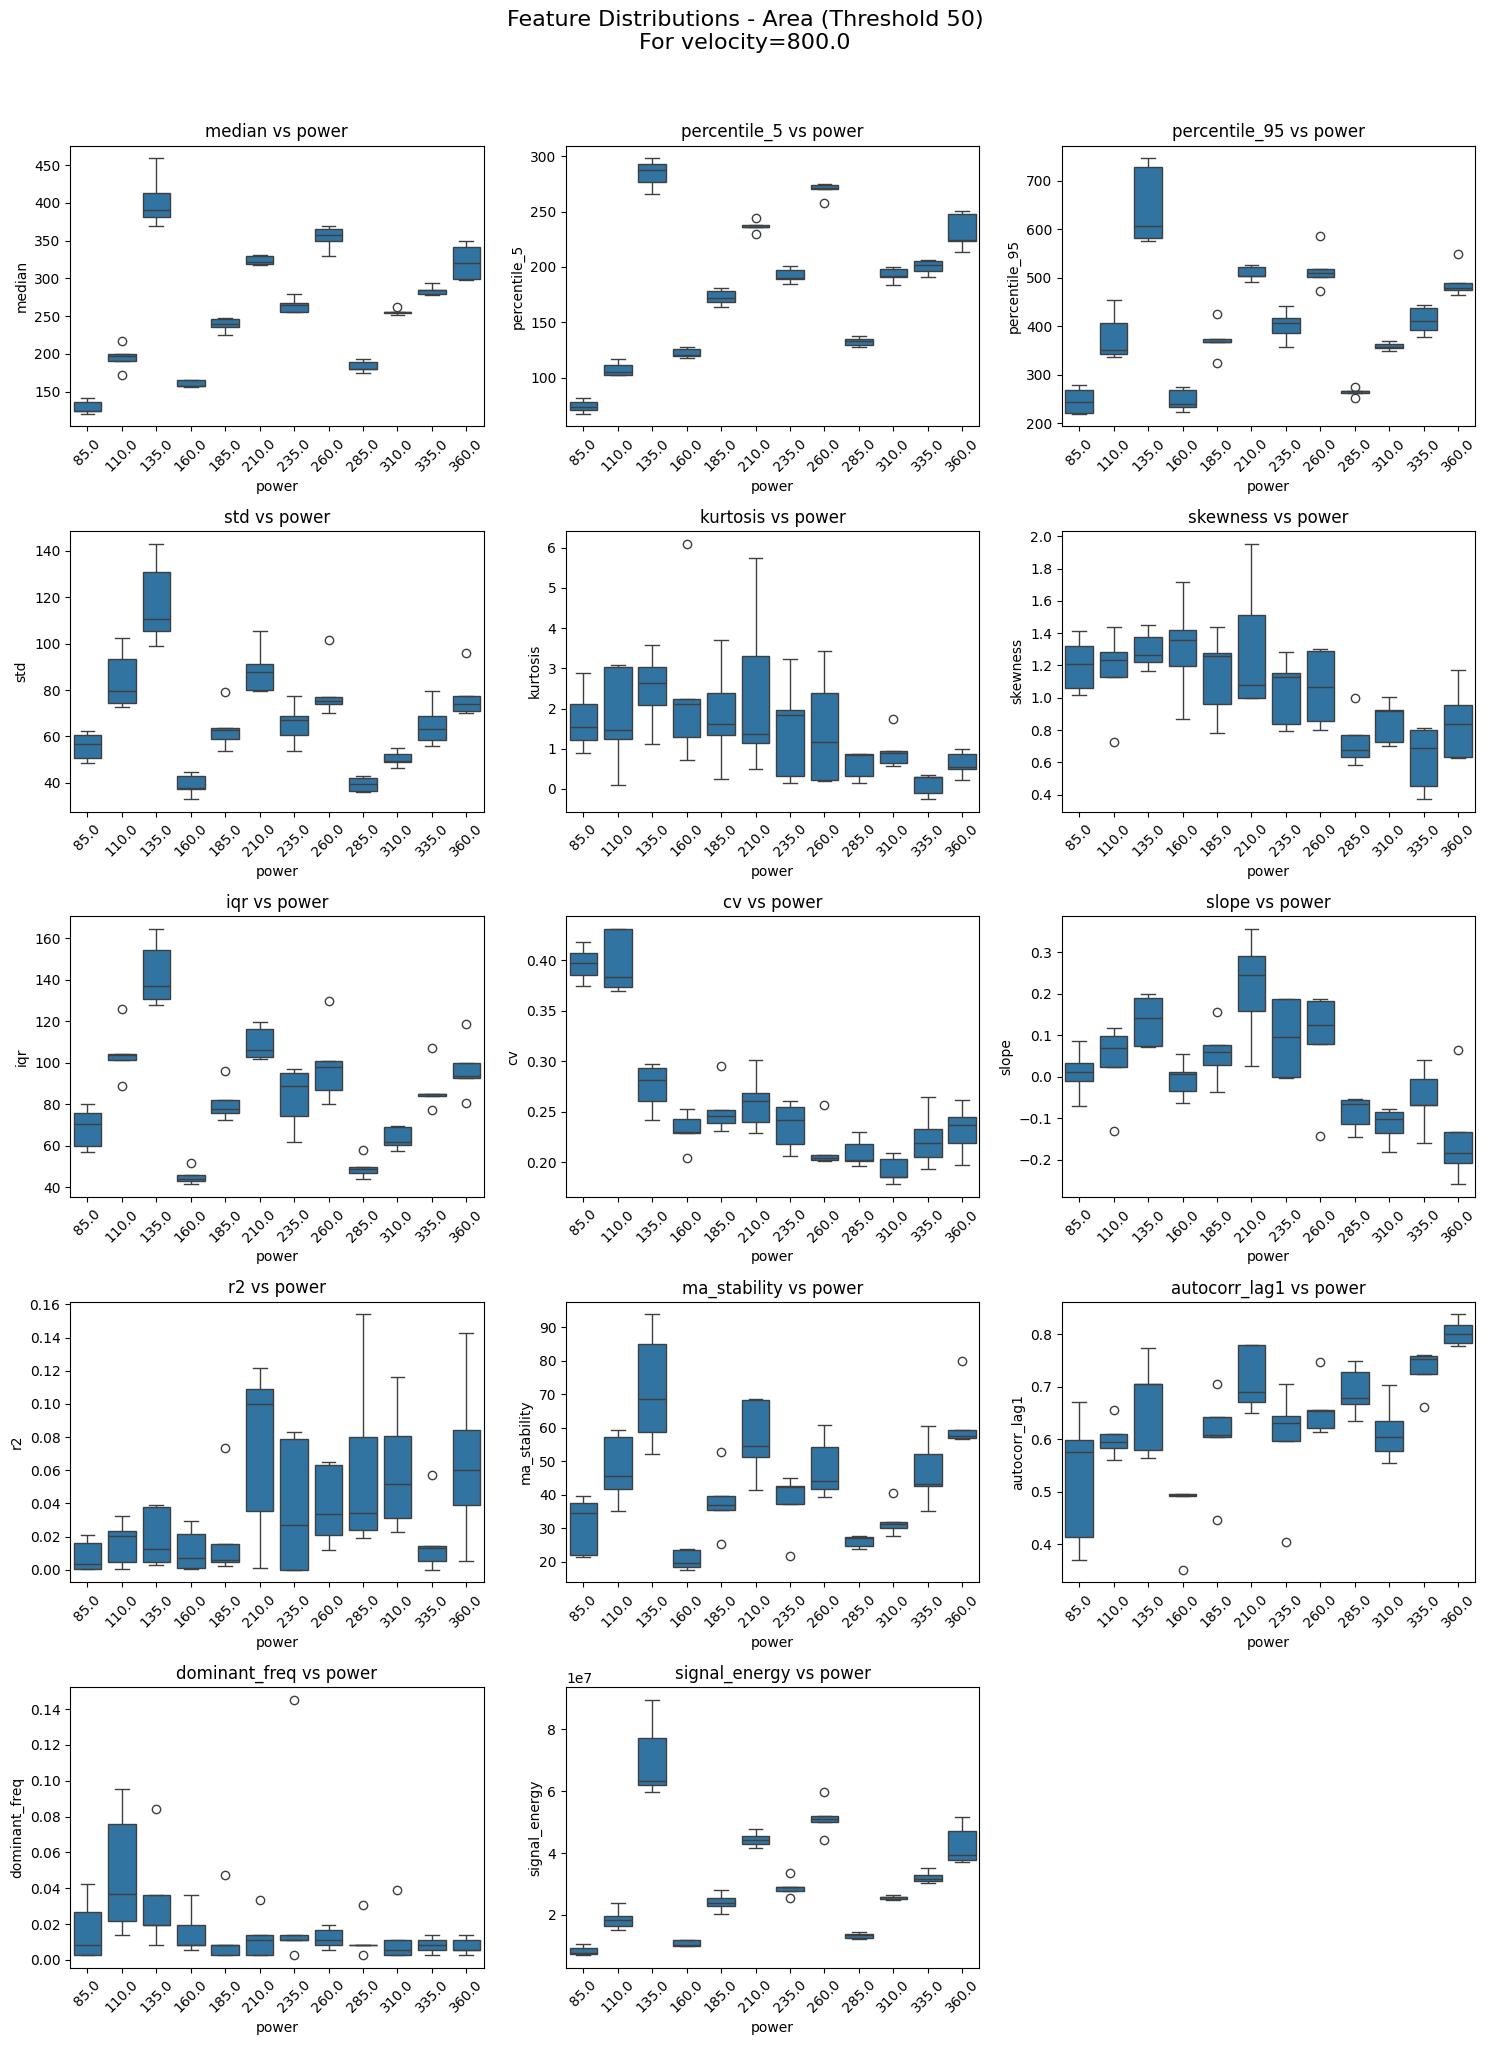

In [10]:
# Plot area features
plot_feature_distributions_by_parameter(
    features_data,
    parameter_type='velocity',
    parameter_value=800.0,
    feature_type='area',
    threshold=50
)

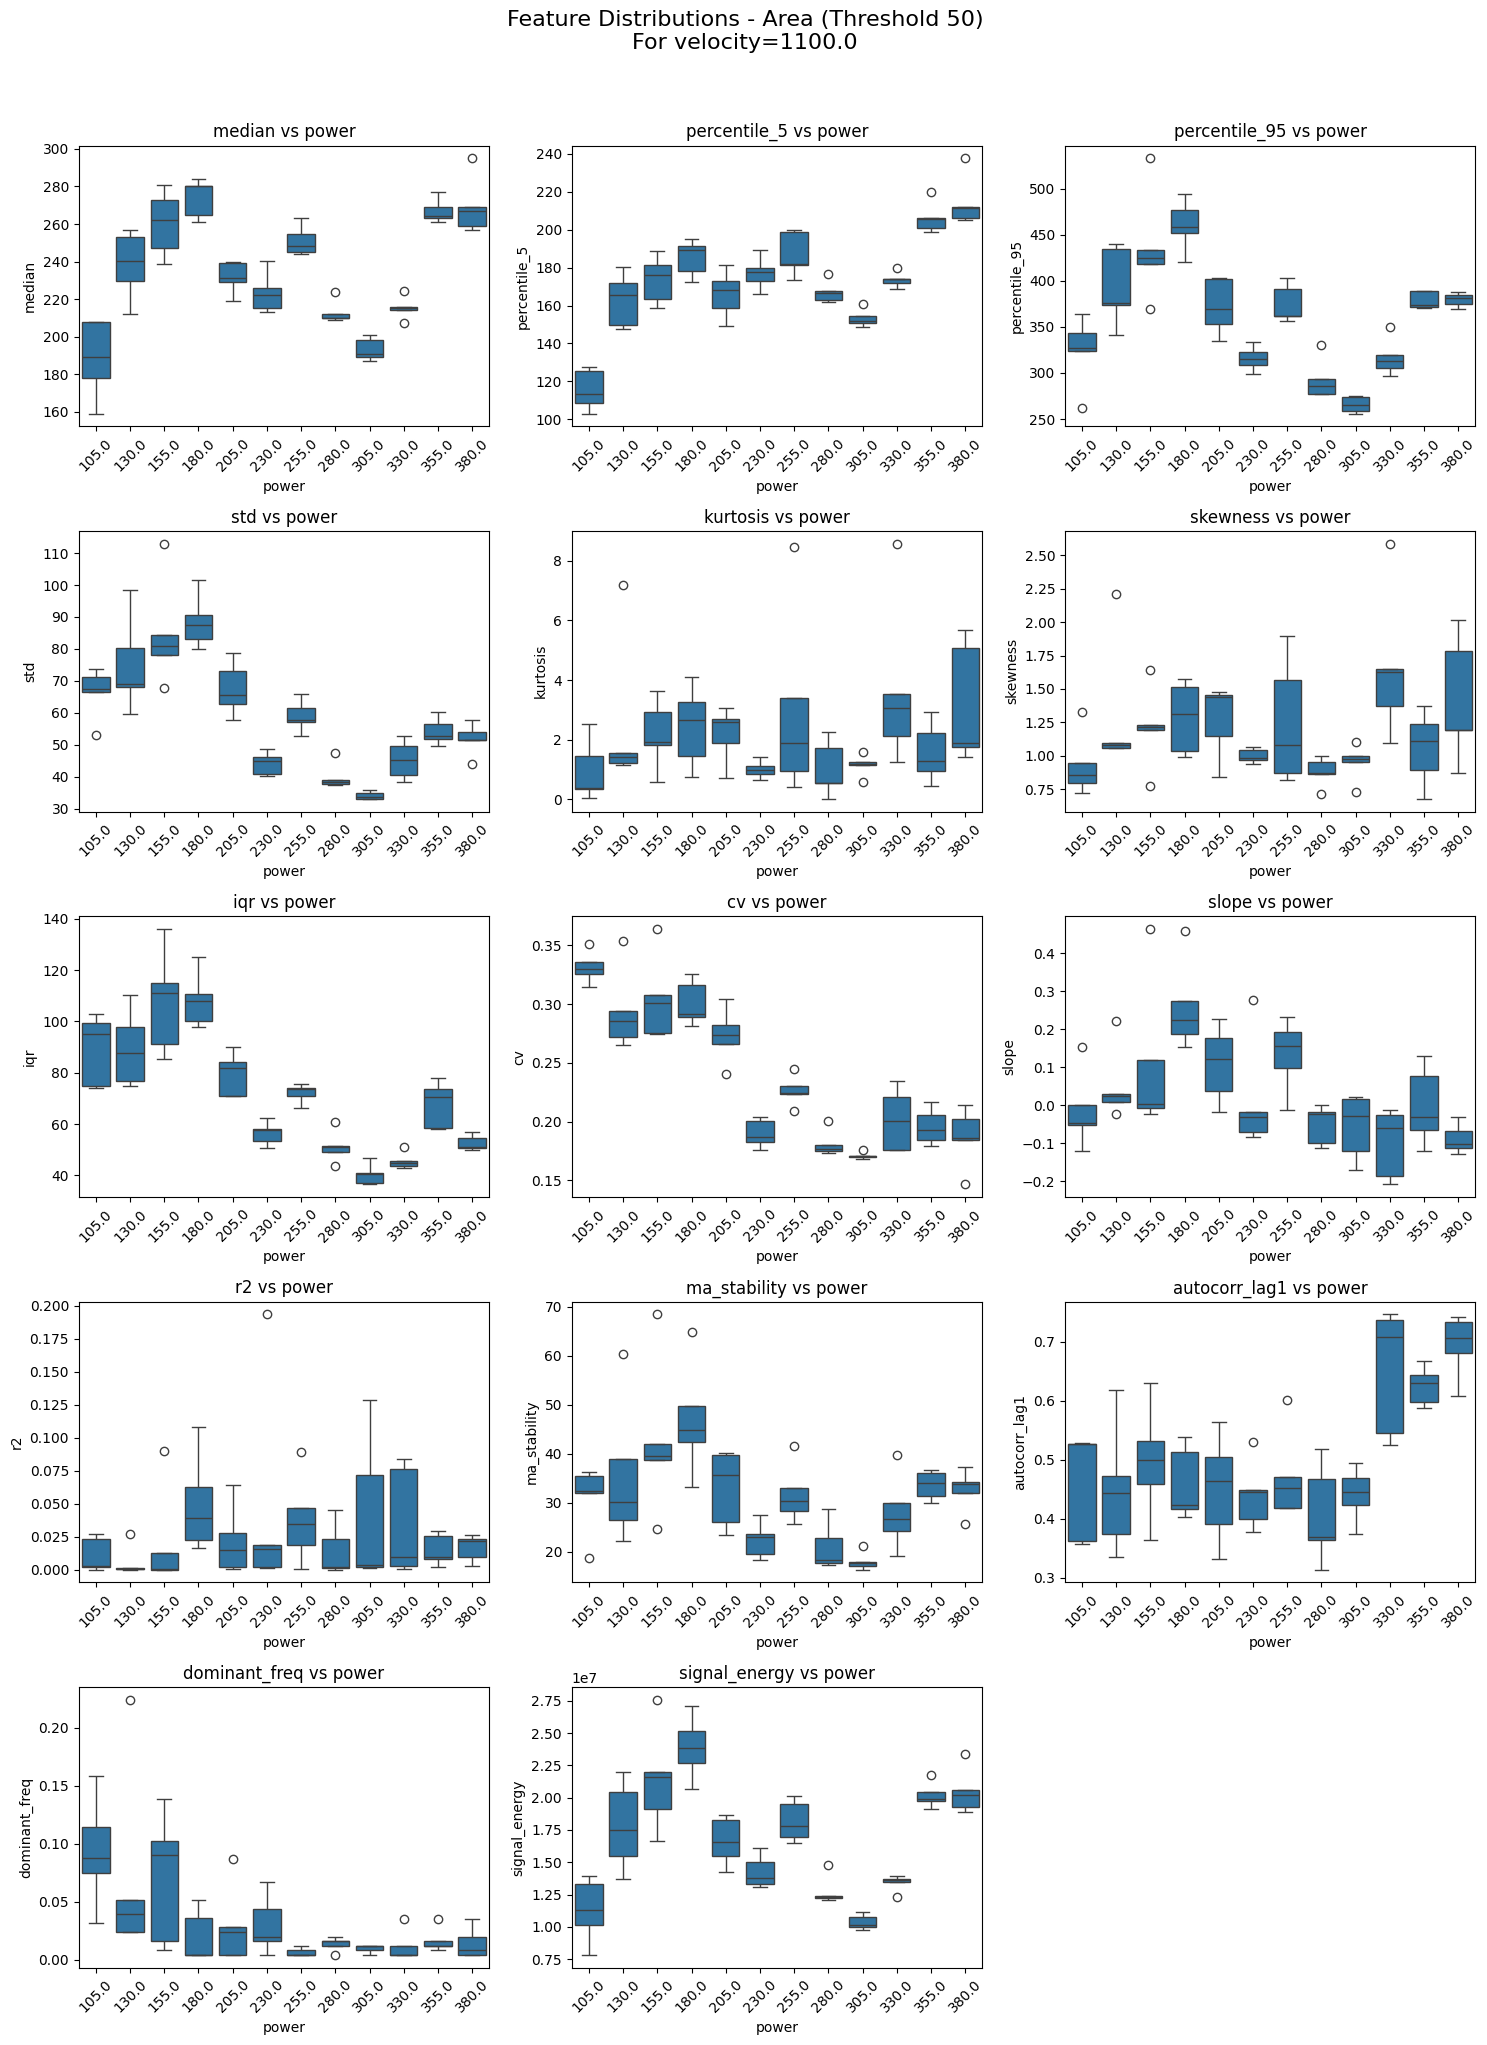

In [11]:
# Plot area features 
plot_feature_distributions_by_parameter(
    features_data,
    parameter_type='velocity',
    parameter_value=1100.0,
    feature_type='area',
    threshold=50
)

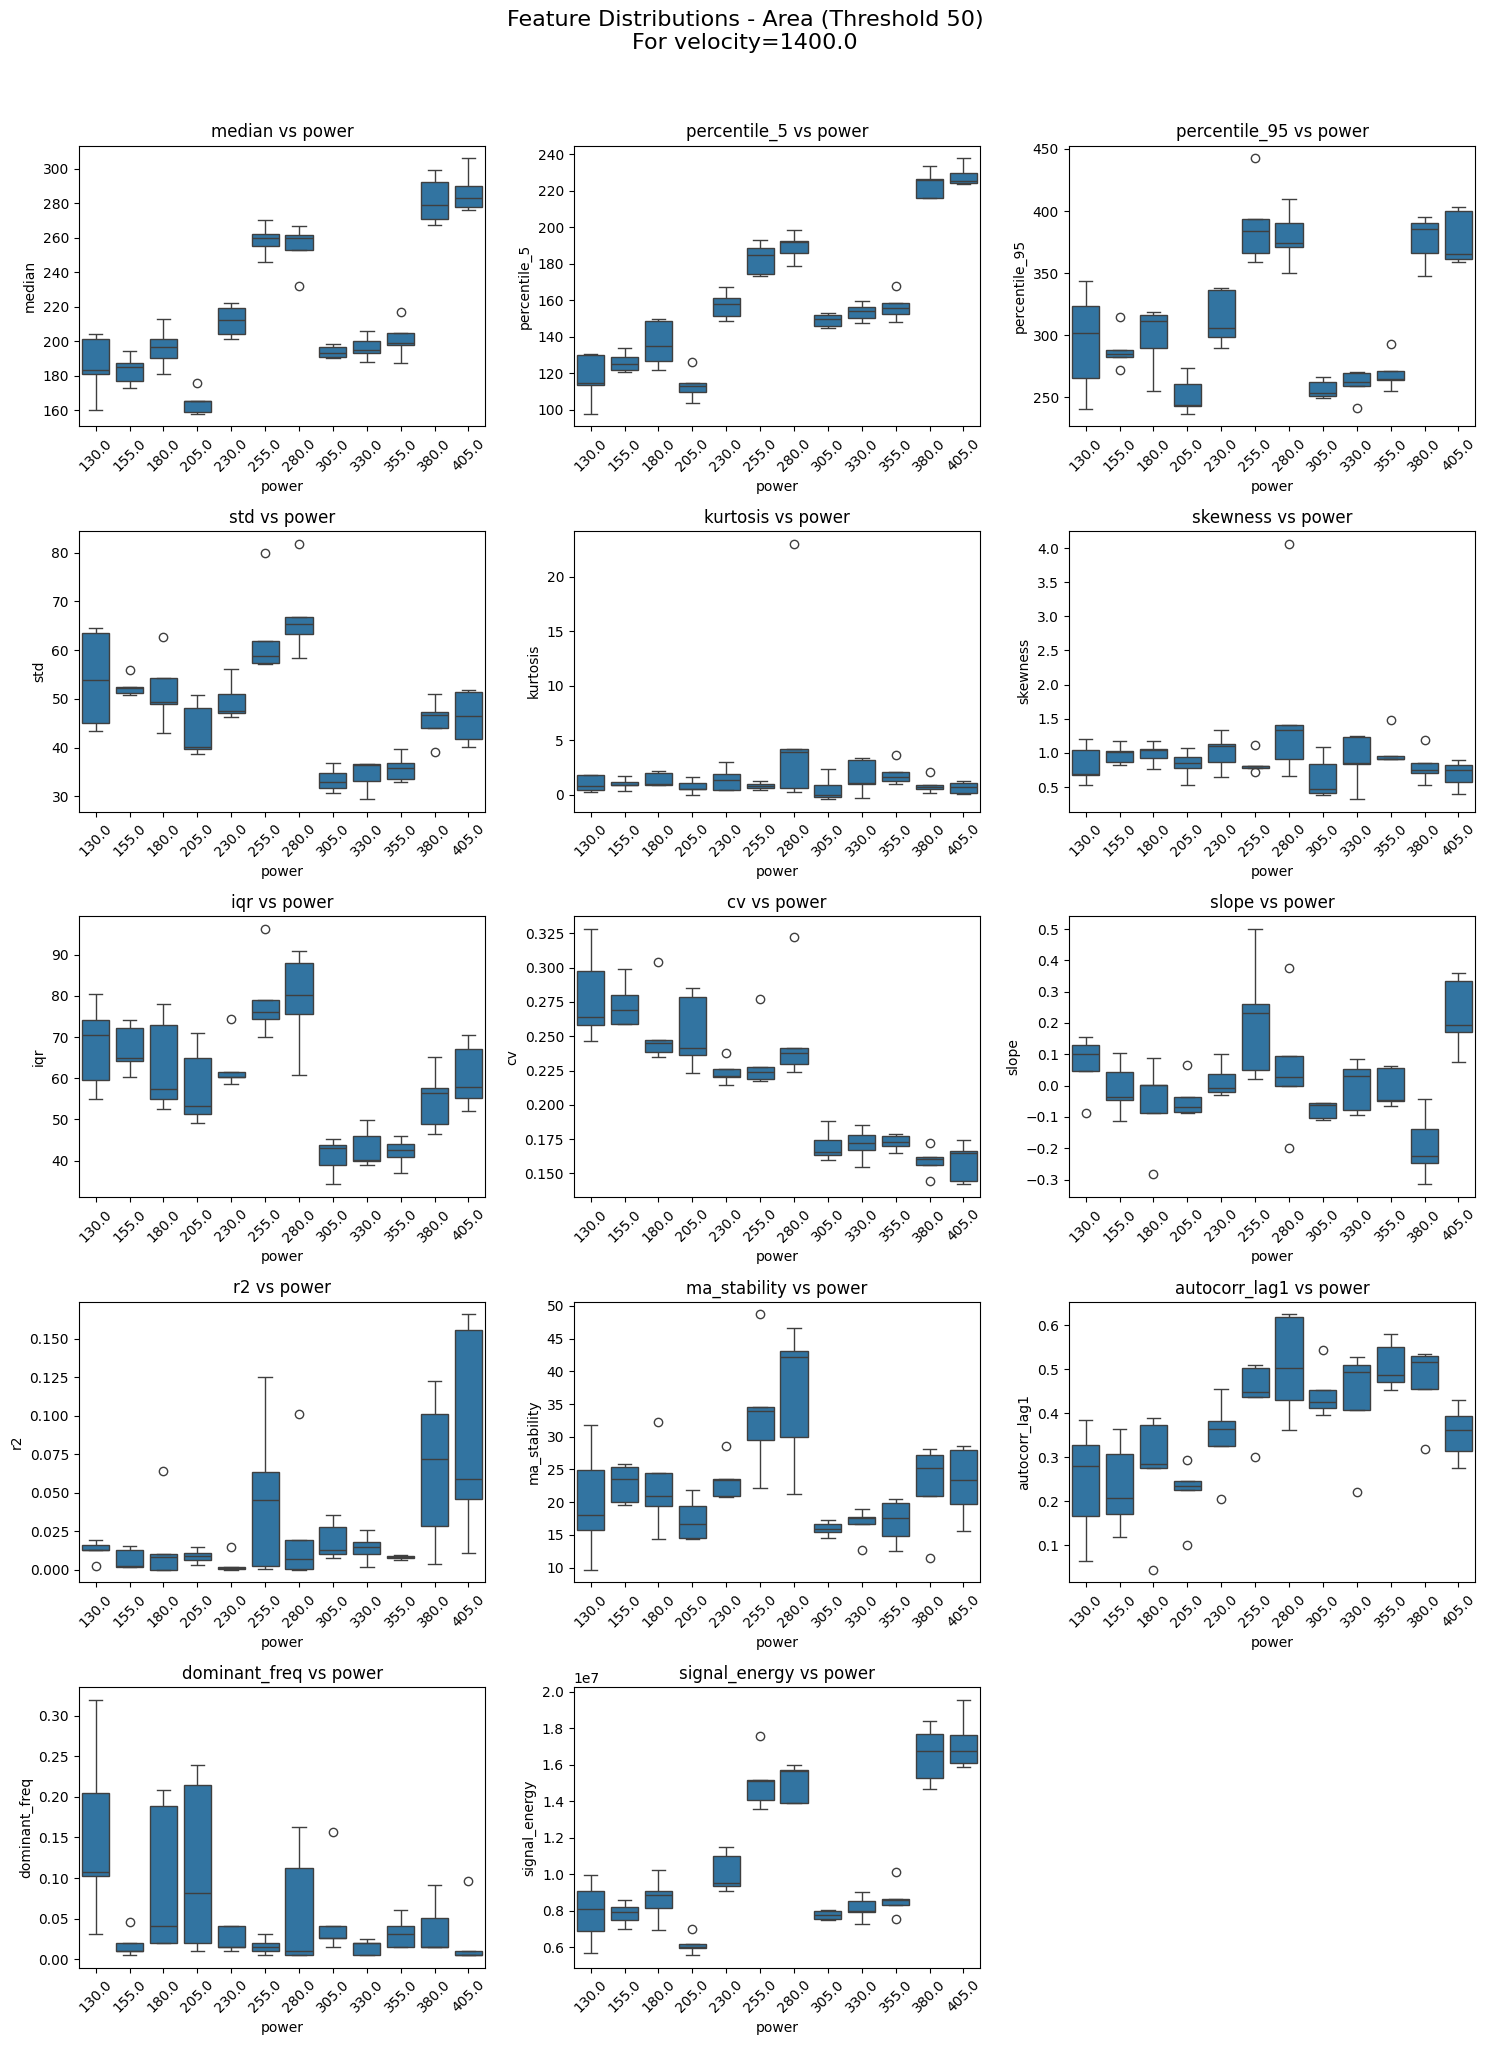

In [12]:
# Plot area features f
plot_feature_distributions_by_parameter(
    features_data,
    parameter_type='velocity',
    parameter_value=1400.0,
    feature_type='area',
    threshold=50
)

In [ ]:
# Plot feature distributions for power = 380W
plot_feature_distributions_by_parameter(
    features_data,
    parameter_type='power',
    parameter_value=380.0,
    feature_type='spatter'
)
